# Analysis pipeline for Specificity

## Preliminaries

In [1]:
%cd ~/code/textrec/

/Users/kcarnold/code/textrec


In [2]:
import datetime
import json
import pathlib

import pandas as pd
import numpy as np
import toolz
from IPython.display import Image, HTML

In [50]:
from textrec.paths import paths
from textrec import analysis_util, util, notebook_util, automated_analyses
reload(analysis_util), reload(util), reload(notebook_util), reload(automated_analyses)

Loading COCO captions
Loading COCO id2url
Done
Loading SpaCy...done


(<module 'textrec.analysis_util' from '/Users/kcarnold/code/textrec/src/textrec/analysis_util.py'>,
 <module 'textrec.util' from '/Users/kcarnold/code/textrec/src/textrec/util.py'>,
 <module 'textrec.notebook_util' from '/Users/kcarnold/code/textrec/src/textrec/notebook_util.py'>,
 <module 'textrec.automated_analyses' from '/Users/kcarnold/code/textrec/src/textrec/automated_analyses.py'>)

In [51]:
from textrec.notebook_util import images, id2img, id2url, show_images

In [52]:
# HTML(show_images([images_by_split['val'][0]['cocoid']]))

In [53]:
%matplotlib inline

## Load results of writing experiment

In [126]:
%run -m textrec.batch_analysis

In [127]:
participants = get_participants_by_batch()
participants.keys()

dict_keys(['2018-04-09', '2018-04-24', '2018-04-27', '2018-05-02-invalid', '2018-05-02-old', '2018-05-02', '2018-06-07-gcap'])

In [128]:
batch = '2018-06-07-gcap'

In [129]:
len(participants[batch])

3

In [137]:
summarize(participants[batch])


pmr872
practice-0:norecs:a black cat napping on a sunny unpainted wood bench in front of a red wall

final-0-0:norecs:a light brown cat with darker tabby markings sits at the edge of a table,  behind a partially visible glass of wine. 
final-0-1:norecs:a small bathroom with a toilet visible on the left and shower doors featuring prominently, from which hangs a tan colored bath towel.

final-0-2:norecs:a toilet, sink and mirror, another toilet visible in the surface of the latter.

final-0-3:norecs:a photographer guides a brides hand through the appropriate motions for cutting her wedding cake as the groom stands beside her.

practice-1:lowConfidence:a man with black hair and glasses placing a large turkey into an upper oven

final-1-0:lowConfidence:several kites are flying as a small group of people prepare their own kites for flight

final-1-1:lowConfidence:a brown and tan train is stopped at an old fashioned blue and white station

final-1-2:lowConfidence:a red double-decker bus app

In [130]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('error')
    analyses = analyze_all(participants[batch], traits='NFC Extraversion Openness Trust')

Randomization counts
norecs,highConfidence,lowConfidence    1
lowConfidence,norecs,highConfidence    1
norecs,lowConfidence,highConfidence    1
Name: conditions, dtype: int64


In [131]:
globals().update(analyses)

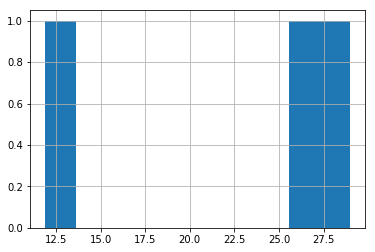

In [111]:
experiment_level.total_time.hist()

In [112]:
experiment_level.total_time.describe()

count     3.000000
mean     22.677983
std       9.374482
min      11.903117
25%      19.534933
50%      27.166750
75%      28.065417
max      28.964083
Name: total_time, dtype: float64

In [113]:
(trial_level.seconds_spent_typing).describe()

count     36.000000
mean      53.272889
std       35.059621
min        9.750000
25%       23.183500
50%       49.183500
75%       72.213500
max      140.377000
Name: seconds_spent_typing, dtype: float64

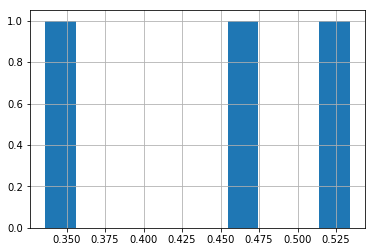

In [114]:
# Fraction of time spent actually typing
((trial_level.groupby('participant').seconds_spent_typing.sum() / 60) / trial_level.groupby('participant').total_time.mean()).hist()

In [115]:
for kind in 'experiment block trial'.split():
    analyses[f'{kind}_level'].to_csv(f'data/analyzed/{kind}_{batch}.csv')

In [116]:
import seaborn as sns

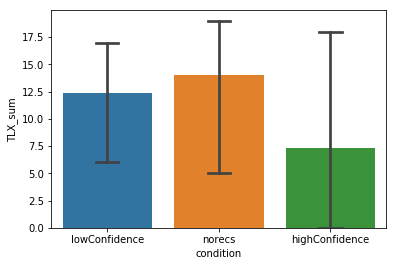

In [117]:
sns.barplot(x='condition', y='TLX_sum', data=block_level, capsize=.2)

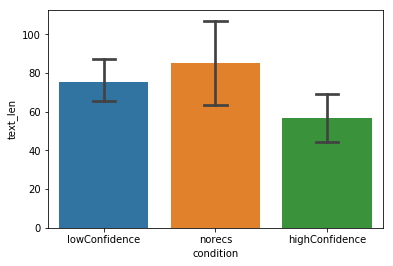

In [118]:
sns.barplot(x='condition', y='text_len', data=trial_level, capsize=.2)

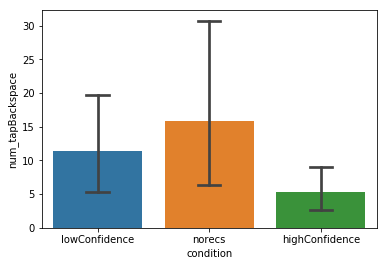

In [119]:
sns.barplot(x='condition', y='num_tapBackspace', data=trial_level, capsize=.2)

In [ ]:
# summarize('2018-05-02')

In [122]:
len(trial_level.text), len(set(trial_level.participant))

(36, 3)

In [123]:
len(trial_level), len(block_level)

(36, 9)

In [132]:
helpful_ranks_by_condition

name,accurate-least-condition,accurate-most-condition,quick-least-condition,quick-most-condition,specific-least-condition,specific-most-condition
highConfidence,0,3,0,2,0,3
lowConfidence,0,0,2,0,0,0
norecs,3,0,1,1,3,0


In [133]:
helpful_ranks_by_idx

name,accurate-least-idx,accurate-most-idx,quick-least-idx,quick-most-idx,specific-least-idx,specific-most-idx
0,2,0,0,1,2,0
1,1,1,2,1,1,1
2,0,2,1,1,0,2


In [134]:
experiment_level['NFC'].describe()

count    3.000000
mean     0.250000
std      0.193132
min      0.080000
25%      0.145000
50%      0.210000
75%      0.335000
max      0.460000
Name: NFC, dtype: float64

In [135]:
experiment_level['Extraversion'].describe()

count    3.000000
mean     0.186667
std      0.166533
min      0.000000
25%      0.120000
50%      0.240000
75%      0.280000
max      0.320000
Name: Extraversion, dtype: float64